# Boston AirBNB Data

### By: Shashwat Singh Mann

Importing necessary files

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Reading CSV files

In [48]:
calender = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

## Exploring the Listing dataset

In [49]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [50]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [51]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [52]:
listings.dropna(subset=["review_scores_rating", "price", "review_scores_value", "neighbourhood", 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'property_type'], axis = 0, inplace = True)

In [53]:
listings.drop(["jurisdiction_names", "license", "has_availability", "square_feet", "neighbourhood_group_cleansed"], axis = 1, inplace = True)

In [54]:
listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1052,5734770,https://www.airbnb.com/rooms/5734770,20160906204935,2016-09-07,Sunny Roofdeck Apartment,Enjoy our sunny home! We're close to Copley S...,Our roof deck is ideal in the warmer months an...,Enjoy our sunny home! We're close to Copley S...,none,Check out dinner at Deluxe or Picco if you're ...,We share a bathroom and we're located on the 5...,We're right next to Back Bay station (Amtrak a...,"We share the kitchen, living room, bathroom an...",We're happy to point people in the right direc...,We're always happy to welcome considerate and ...,https://a1.muscache.com/im/pictures/73809178/c...,https://a1.muscache.com/im/pictures/73809178/c...,https://a1.muscache.com/im/pictures/73809178/c...,https://a1.muscache.com/im/pictures/73809178/c...,27015747,https://www.airbnb.com/users/show/27015747,Ashley & Dennis,2015-01-31,"Boston, Massachusetts, United States",NaN,within an hour,92%,100%,f,https://a0.muscache.com/im/users/27015747/prof...,https://a0.muscache.com/im/users/27015747/prof...,South End,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Columbus Avenue, Boston, MA 02116, United States",South End,South End,Boston,MA,02116,Boston,"Boston, MA",US,United States,42.347080,-71.073611,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$150.00,$850.00,"$2,900.00",$200.00,$25.00,1,$0.00,2,21,3 weeks ago,6,19,32,59,2016-09-06,87,2015-04-06,2016-09-05,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,f,f,1,5.01
1887,8384444,https://www.airbnb.com/rooms/8384444,20160906204935,2016-09-07,Charming Escape in Beacon Hill,Come share our home and experience a true Bost...,Our apartment is on the South Slope of Beacon ...,Come share our home and experience a true Bost...,none,NaN,NaN,Just a quick walk away from a number of differ...,You'll have access to the whole first floor of...,This is the primary residence for my boyfriend...,NaN,https://a2.muscache.com/im/pictures/d9012ae5-a...,https://a2.muscache.com/im/pictures/d9012ae5-a...,https://a2.muscache.com/im/pictures/d9012ae5-a...,https://a2.muscache.com/im/pictures/d9012ae5-a...,14587487,https://www.airbnb.com/users/show/14587487,Cara,2014-04-22,"Boston, Massachusetts, United States","25 year-old, young professional living in Bost...",within a day,70%,77%,t,https://a2.muscache.com/im/pictures/e5d299d2-9...,https://a2.muscache.com/im/pictures/e5d299d2-9...,Beacon Hill,2,2,"['email', 'phone', 'reviews', 'kba']",t,t,"W Cedar St., Boston, MA 02108, United States",Beacon Hill,Beacon Hill,Boston,MA,02108,Boston,"Boston, MA",US,United States,42.357892,-71.069628,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Intern

In [55]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
      

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
listings.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3210,12738641,https://www.airbnb.com/rooms/12738641,20160906204935,2016-09-07,Cozy Bedroom in South Boston,Hello! The apartment is in South Boston within...,NaN,Hello! The apartment is in South Boston within...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/8bdeddd2-7...,https://a2.muscache.com/im/pictures/8bdeddd2-7...,https://a2.muscache.com/im/pictures/8bdeddd2-7...,https://a2.muscache.com/im/pictures/8bdeddd2-7...,69277254,https://www.airbnb.com/users/show/69277254,Ben,2016-04-27,US,NaN,within an hour,100%,100%,f,https://a2.muscache.com/im/pictures/4623ef75-2...,https://a2.muscache.com/im/pictures/4623ef75-2...,South Boston,1,1,"['phone', 'reviews']",t,f,"Gold Street, Boston, MA 02127, United States",South Boston,South Boston,Boston,MA,02127,Boston,"Boston, MA",US,United States,42.334821,-71.049212,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$57.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,a week ago,0,0,0,0,2016-09-06,7,2016-05-05,2016-07-30,97.0,10.0,9.0,10.0,10.0,10.0,10.0,f,t,flexible,f,f,1,1.67
1991,7244031,https://www.airbnb.com/rooms/7244031,20160906204935,2016-09-07,Beacon Hill 3rd Floor 1 BR,Open floorplan living/dining/kitchen; separate...,A note on reserving: If you'd like to use just...,Open floorplan living/dining/kitchen; separate...,none,NaN,If you'd like to use the air mattress as a sec...,NaN,You'll have full (and exclusive) use of bedroo...,"I only post this listing when I'm out of town,...",NaN,NaN,NaN,https://a2.muscache.com/im/pictures/91869708/3...,NaN,22052842,https://www.airbnb.com/users/show/22052842,Greg,2014-10-02,"Boston, Massachusetts, United States",NaN,within a day,100%,25%,f,https://a2.muscache.com/im/users/22052842/prof...,https://a2.muscache.com/im/users/22052842/prof...,Beacon Hill,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,"Joy Street, Boston, MA 02114, United States",Beacon Hill,Beacon Hill,Boston,MA,02114,Boston,"Boston, MA",US,United States,42.360026,-71.064847,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$125.00,$600.00,NaN,NaN,$35.00,2,$25.00,3,1125,4 weeks ago,0,0,0,0,2016-09-06,6,2015-07-16,2016-06-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,1,0.43


## Wrangling and Cleaning Listings Data

In [58]:
cols = ['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'property_type', 'accommodates', 'bathrooms', 'beds', 'price', 'review_scores_value', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'neighbourhood']

In [59]:
listings = listings[cols]
listings.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,beds,price,review_scores_value,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,neighbourhood
1,3075044,within an hour,100%,100%,Apartment,2,1.0,1.0,$65.00,9.0,94.0,9.0,10.0,9.0,Roslindale
2,6976,within a few hours,100%,88%,Apartment,2,1.0,1.0,$65.00,10.0,98.0,9.0,10.0,9.0,Roslindale
4,7651065,within an hour,100%,100%,House,2,1.5,2.0,$79.00,10.0,99.0,10.0,10.0,9.0,Roslindale
5,12386020,within a few hours,100%,95%,Condominium,2,1.0,1.0,$75.00,10.0,100.0,10.0,10.0,9.0,Roslindale
7,2843445,within a few hours,100%,100%,House,2,2.0,1.0,$75.00,10.0,96.0,10.0,10.0,10.0,Roslindale


In [60]:
wrangle_prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
listings['price']=listings['price'].apply(wrangle_prices)
listings['price'] = pd.to_numeric(listings['price'])

listings.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,beds,price,review_scores_value,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,neighbourhood
1,3075044,within an hour,100%,100%,Apartment,2,1.0,1.0,65,9.0,94.0,9.0,10.0,9.0,Roslindale
2,6976,within a few hours,100%,88%,Apartment,2,1.0,1.0,65,10.0,98.0,9.0,10.0,9.0,Roslindale
4,7651065,within an hour,100%,100%,House,2,1.5,2.0,79,10.0,99.0,10.0,10.0,9.0,Roslindale
5,12386020,within a few hours,100%,95%,Condominium,2,1.0,1.0,75,10.0,100.0,10.0,10.0,9.0,Roslindale
7,2843445,within a few hours,100%,100%,House,2,2.0,1.0,75,10.0,96.0,10.0,10.0,10.0,Roslindale


In [83]:
wrangle_data = lambda x : (x.replace('%',''))
listings['host_response_rate']=listings['host_response_rate'].apply(wrangle_data)
listings['host_response_rate'].head()

1    100
2    100
4    100
5    100
7    100
Name: host_response_rate, dtype: object

In [84]:
wrangle_data = lambda x : (x.replace('%',''))
listings['host_acceptance_rate']=listings['host_acceptance_rate'].apply(wrangle_data)
listings['host_acceptance_rate'].head()

1    100
2     88
4    100
5     95
7    100
Name: host_acceptance_rate, dtype: object

In [85]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 1 to 3583
Data columns (total 15 columns):
id                             2160 non-null int64
host_response_time             2160 non-null object
host_response_rate             2160 non-null object
host_acceptance_rate           2160 non-null object
property_type                  2160 non-null object
accommodates                   2160 non-null int64
bathrooms                      2150 non-null float64
beds                           2158 non-null float64
price                          2160 non-null int64
review_scores_value            2160 non-null float64
review_scores_rating           2160 non-null float64
review_scores_cleanliness      2159 non-null float64
review_scores_communication    2159 non-null float64
review_scores_location         2159 non-null float64
neighbourhood                  2160 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 350.0+ KB


## Wrangling and Cleaning Calendar Data

In [86]:
calender.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65,2017-08
366,3075044,2017-08-21,t,65,2017-08
367,3075044,2017-08-20,t,65,2017-08
368,3075044,2017-08-19,t,75,2017-08
369,3075044,2017-08-18,t,75,2017-08


In [87]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 5 columns):
listing_id    643037 non-null object
date          643037 non-null datetime64[ns]
available     643037 non-null object
price         643037 non-null object
month         643037 non-null period[M]
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 49.4+ MB


In [88]:
calender.price.isnull().sum()/calender.shape[0]

0.0

In [89]:
calender.dropna(subset=['price'],axis=0,inplace=True)
calender.price.astype(str)
calender['date']= pd.to_datetime(calender['date'])

In [90]:
wrangle_prices = lambda x : (x.replace('.00','').replace('$','').replace(',',''))
calender.price=calender.price.apply(wrangle_prices)
calender['price'].head()

365    65
366    65
367    65
368    75
369    75
Name: price, dtype: object

In [91]:
calender.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65,2017-08
366,3075044,2017-08-21,t,65,2017-08
367,3075044,2017-08-20,t,65,2017-08
368,3075044,2017-08-19,t,75,2017-08
369,3075044,2017-08-18,t,75,2017-08


In [92]:
calender['listing_id'] =calender['listing_id'].astype(str)

In [93]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 5 columns):
listing_id    643037 non-null object
date          643037 non-null datetime64[ns]
available     643037 non-null object
price         643037 non-null object
month         643037 non-null period[M]
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 29.4+ MB


In [94]:
calender.describe()

,listing_id,date,available,price,month
count,643037,643037,643037,643037,643037
unique,2906,365,1,1246,13
top,13060366,2016-12-04 00:00:00,t,150,2017-01
freq,365,2207,643037,20752,63181
first,NaN,2016-09-06 00:00:00,NaN,NaN,NaN
last,NaN,2017-09-05 00:00:00,NaN,NaN,NaN


Yeah, I did notice that I've spelled "Calendar" incorrectly

## Wrangling and Cleaning Reviews Dataset

In [95]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [96]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [97]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


Yeah, just felt that there wasn't much to do in this data set

## Visualization

In [98]:
listings.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,property_type,accommodates,bathrooms,beds,price,review_scores_value,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,neighbourhood
1,3075044,within an hour,100,100,Apartment,2,1.0,1.0,65,9.0,94.0,9.0,10.0,9.0,Roslindale
2,6976,within a few hours,100,88,Apartment,2,1.0,1.0,65,10.0,98.0,9.0,10.0,9.0,Roslindale
4,7651065,within an hour,100,100,House,2,1.5,2.0,79,10.0,99.0,10.0,10.0,9.0,Roslindale
5,12386020,within a few hours,100,95,Condominium,2,1.0,1.0,75,10.0,100.0,10.0,10.0,9.0,Roslindale
7,2843445,within a few hours,100,100,House,2,2.0,1.0,75,10.0,96.0,10.0,10.0,10.0,Roslindale


### Finding a correlation between number of beds, accommodates and price

Text(0, 0.5, 'Price')

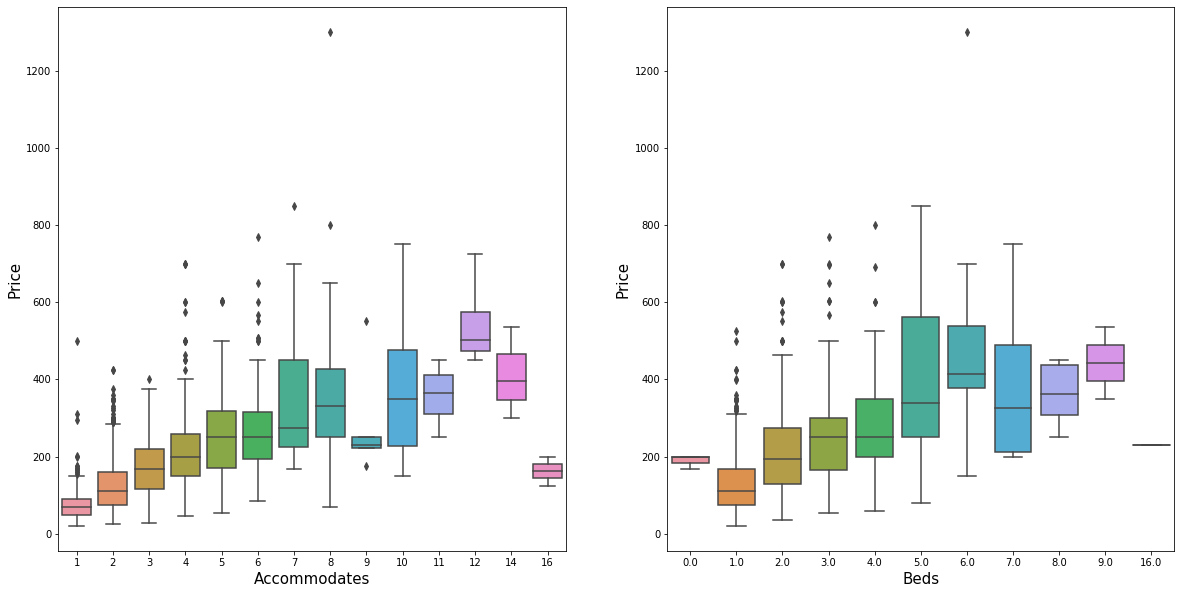

In [99]:
# Boxplots about accommodates, beds and price
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='accommodates', y='price', data=listings)
plt.xlabel(xlabel='Accommodates', fontsize=15)
plt.ylabel(ylabel='Price', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(x='beds', y='price', data=listings)
plt.xlabel(xlabel='Beds', fontsize=15)
plt.ylabel(ylabel='Price', fontsize=15)

### Finding the total counts of rents in each month

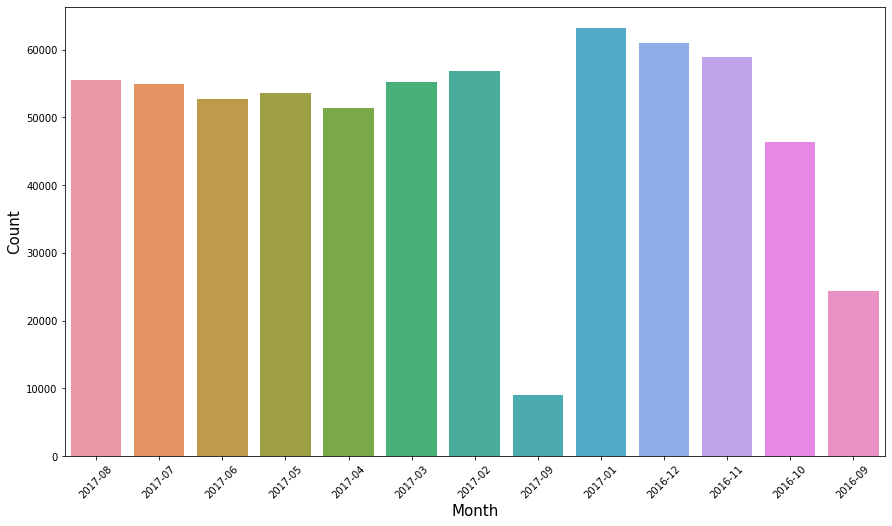

In [100]:
plt.figure(figsize=(14.70, 8.27))
calender['month'] = pd.to_datetime(calender['date']).dt.to_period('M')
sns.countplot(data= calender, x= 'month')
plt.xlabel('Month',fontsize= 15)
plt.ylabel('Count',fontsize= 15)
plt.xticks(rotation=45); # rotating the text at x axis so that it's readable

It took 15 minutes and still the above cell was running when I tried to keep it in an order. So this is the reason I've kept it as it is.

### User Satisfaction

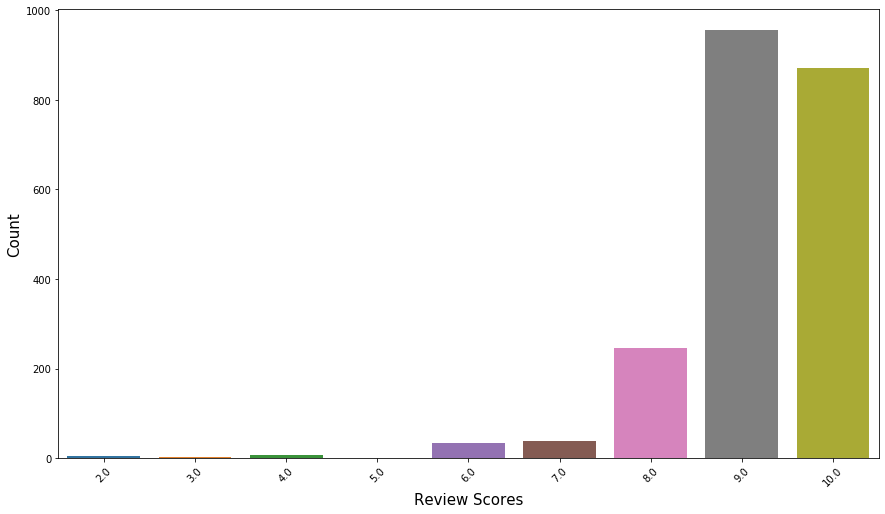

In [101]:
plt.figure(figsize=(14.70, 8.27))
sns.countplot(data= calender, x= listings['review_scores_value'])
plt.xlabel('Review Scores',fontsize= 15)
plt.ylabel('Count',fontsize= 15)
plt.xticks(rotation=45);

### Price Based on Neighbourhood

In [102]:
def barchart(listings,column,sort_value):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    listings = listings.sort_values(by = sort_value)
    sns.barplot(x='neighbourhood', y=column, data = listings)
    plt.xlabel(xlabel='Neighbourhood', fontsize=18)
    plt.ylabel(ylabel=column, fontsize=18)

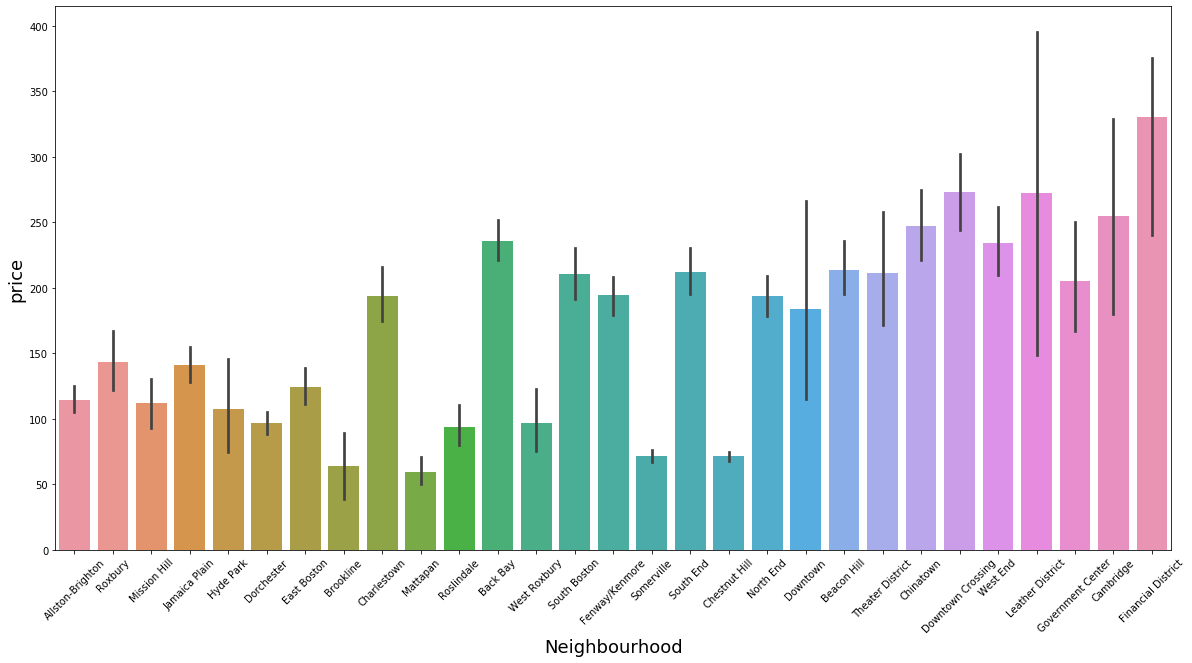

In [103]:
barchart(listings,'price','price')

### Reviews Based on Neighbourhood

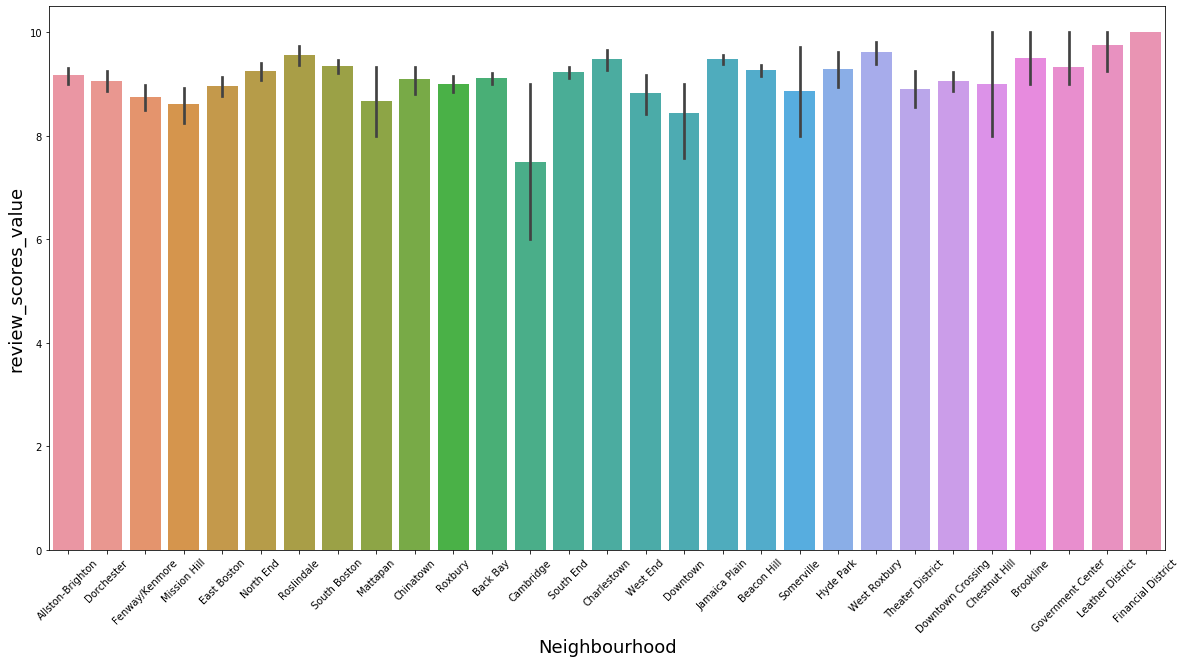

In [104]:
barchart(listings, 'review_scores_value', 'review_scores_value')

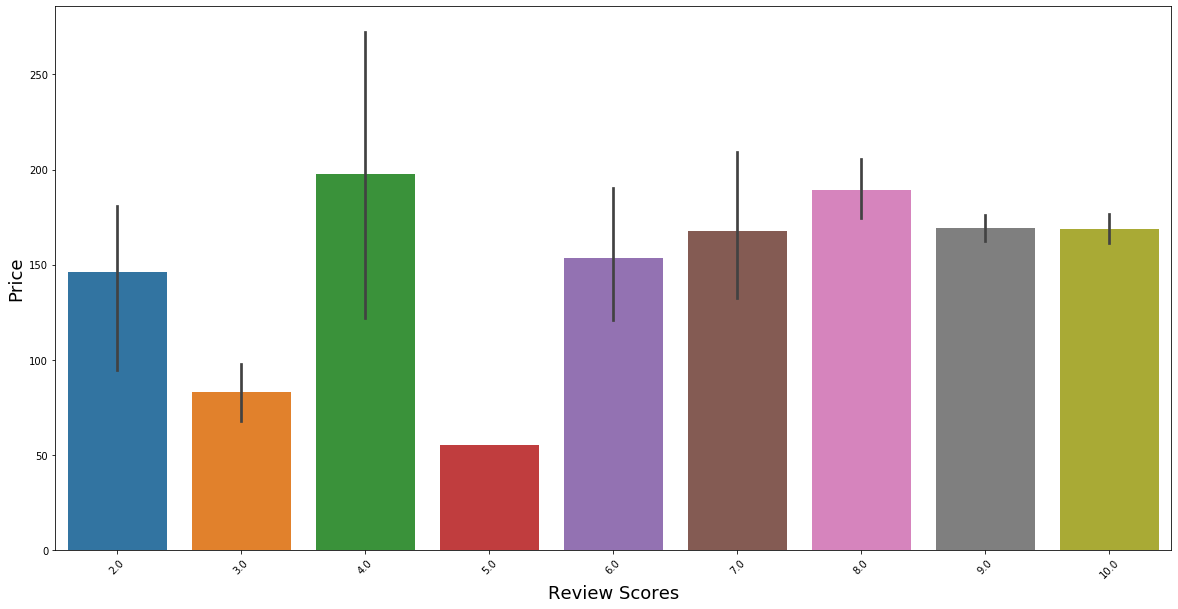

In [105]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x='review_scores_value', y='price', data = listings)
plt.xlabel(xlabel='Review Scores', fontsize=18)
plt.ylabel(ylabel= 'Price', fontsize=18);

<Figure size 3600x3600 with 0 Axes>

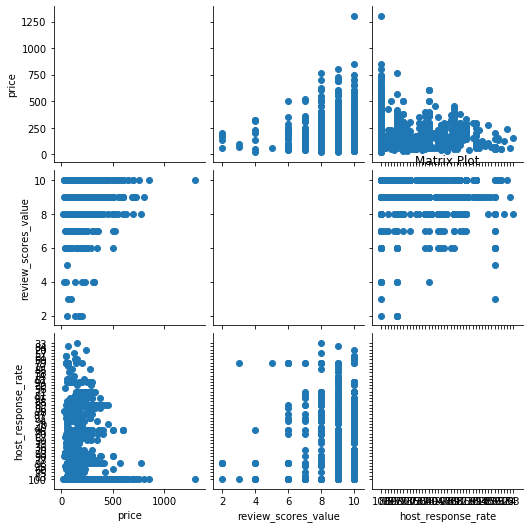

In [132]:
num_vars = ['price', 'review_scores_value', 'host_response_rate']
plt.figure(figsize = [50, 50])
g = sns.PairGrid(data = listings, vars = num_vars)
g.fig.subplots_adjust(hspace=.05, wspace=.05)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');

The plot above shows that with high host response rate to the customers gives a higher review score which further leads to its higher price.